# War and Peace: Modelling the Battle of 73 Easting

## 1. Introduction 
    
On 26 February 1991 [10], the last large scale tank battle ever fought took place between the UN coalition forces against the Iraqi Armored Division as part of Operation Desert Sabre. The result was the decimation of the Iraqi forces, with them losing 160 tanks compared to the UN forces losing none of their tanks even though the Iraqi forces had an overwhelming numerical advantage. If the Iraqi commanders could have modelled this battle before hand and foreseen this outcome, would they have chosen a different course of action?

Modelling and simulation thus play a huge role in the military domain and the United States even has a dedicated entity, the Modeling and Simulation Coordination Office, towards developing and implementing accurate simulations [3]. The benefits of a successful prediction cannot be understated, but its definitely not the sole benefit of a precise model. The use of a model facilitates the testing of hypothetical questions [12], the what-ifs that could possibly flip the narrative, without having to spend resources on physical war games. Some hypothetical can even be physically impossible to conduct without significant risk.

This tutorial hopes to emphasize these benefits and difficulties faced when applying the various models when applied to a military battle and this process will cover the development of the models in increasing granularity, increasing in complexity by incorporating additional factors with each subsequent model [11].


## 2. Problem Description

Operation Desert Sabre started on 24 February [15] and encompassed the entire coalition’s efforts in counterattacking Iraq by crossing the border from Kuwait. The Battle of 73 Easting, in particular,refers to a few hours of the 3rd day of this operation when the 2nd Armored Calvary Regiment advanced from 70 Easting to 73 Easting at 1545H, meeting the Tawakalna 18th Mechanized Brigade and the 9th Armored Brigade.

### 2.1 Model Input and Output
<img src = "model.jpg" style="width: 200px;height:400px;transform:rotate(-90deg)">
Giving the context of the battle, the input of each model can be seen as the number, strength, and location of each tank. From these parameters, the model will then output the predicted number of casualties on both sides. For the Battle of 73 Easting, the number of units on both sides are listed in Table 1 and 2 [11]. 

### 2.2 Assumptions
1. All armored units are homogeneous and have the same equipment as other tanks of the same model.
2. Infantry fire is negligible due to their low numbers and low effectiveness against armored vehicles.
3. The theatre for the battle is limited to a small area between 70 and 73 Easting.
    
### 2.3 Aim
The aim of this tutorial is to simulate the Battle of 73 Easting under the above conditions by determining the parameters of each model. Each model will then be evaluated on
1. Accuracy compared to the final product
2. Ease of modifying the model to account for hypothetical situations

## 3. Continuous Time Model

In 1916, Lanchester observed that in modern warfare, with guns and not swords, multiple units are able to direct their fire at a single enemy and developed the square law. He postulated that the rate of decrease in an enemy’s number of troops is directly proportional to the the number of troops multiplied by their effectiveness [8]. Mathematically, with $f$ and $e$ representing friendly and enemy forces respectively and $e$ representing the force effectiveness of friendly forces.

<br /><center>$\frac{dF}{dt} = -Ee$<center><br />
    
Furthermore, the force effectiveness $f$ and $e$ can be determined by multiplying the number of shots possible per unit time, multiplied by the probability of each shot being a kill.

<br /><center>$f = r_Fp_{kill,F,E}$<center><br />
    
where $r_F$ is the rate of fire of friendly forces, and $p_{kill,F,E}$ is the probability a fired shot from a friendly unit kills an enemy unit. A close examination of this model reveals that the largest challenge in producing an accurate model is the determination of $p_{kill,F,E}$ as $r_F$ is largely constant and unaffected by external factors. $p_{kill,F,E}$ however, can be affected by a large array of factors, from external factors such as the weather or terrain, to soft factors such as crew
training and morale. For the purpose of this tutorial, the empirically tested probabilities will be used as the initial value from which the parameter will be tuned. The deviation required for an accurate model can then be found and an analysis will be conducted to determine if such a deviation was realistic given the ground conditions at that time. The model is a continuous time model with each step $dt$ being infinitesimally small. However, this is not feasible when programming a real system and thus the model needs to be discretized. This can be achieved [14] by setting

<br /><center>$\Delta(F) = F + \frac{d}{dt}(F)\Delta t$<center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
class UN:
    
    def __init__(self, N, p=0.6, r=9):
        # Aggregate parameters for UN tanks
        
        self.p = p # probability of kill
        self.r = r # shots per minute
        self.num = N # number of tanks left

In [156]:
class Iraqi:
    
    def __init__(self, N, p=0.02, r=8):
        # Aggregate parameters for UN tanks
        
        self.p = p # probability of kill
        self.r = r # shots per minute
        self.num = N # number of tanks left

In [157]:
def F(defending,attacking):
    defence = defending.num - attacking.num * attacking.p * attacking.r
    attack = attacking.num - defending.num * defending.p * defending.r
    defending.num = max(defence,0)
    attacking.num = max(attack,0)

In [158]:
# Time step is 1 minute
def sim(F, blue, red, t_max):
    track_un = [blue.num]
    track_iraqi = [red.num]
    for t in range(t_max):
        F(blue,red)
        track_un.append(blue.num)
        track_iraqi.append(red.num)
    return track_un, track_iraqi

In [159]:
blue = UN(123)
red = Iraqi(265)
T_MAX = 30

In [160]:
track_un, track_iraqi = sim(F, blue, red, T_MAX)
print(track_un)
print(track_iraqi)

[123, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6, 80.6]
[265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


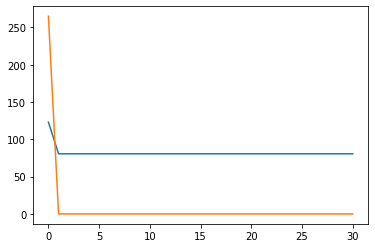

In [161]:
t = range(0,T_MAX + 1)
plt.plot(t, track_un, t, track_iraqi)
plt.show()

In [162]:
strength = range(265, 1000, 10)
rem_un = []
rem_iraqi = []
for x in strength:
    blue = UN(123)
    red = Iraqi(x)
    track_un, track_iraqi = sim(F, blue, red, T_MAX)
    rem_un.append(track_un[-1])
    rem_iraqi.append(track_iraqi[-1])

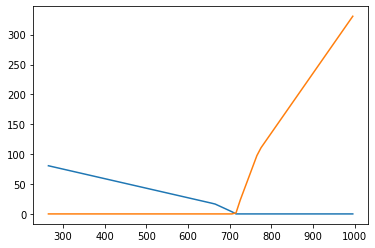

In [163]:
plt.plot(strength, rem_un, strength, rem_iraqi)
plt.show()

In [170]:
strength = np.arange(0.02, 0.1, 0.01)
rem_un = []
rem_iraqi = []
for p in strength:
    blue = UN(123)
    red = Iraqi(265,p=p)
    track_un, track_iraqi = sim(F, blue, red, T_MAX)
    rem_un.append(track_un[-1])
    rem_iraqi.append(track_iraqi[-1])

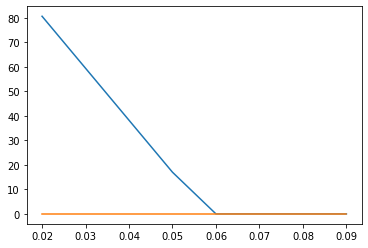

In [171]:
plt.plot(strength, rem_un, strength, rem_iraqi)
plt.show()